In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import planarity
from networkx.algorithms import community

In [56]:
raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
# # raw_data.columns.values
# print(raw_data['month'])

代码
600030.SH    2010-01
600030.SH    2010-01
600030.SH    2010-01
600030.SH    2010-01
600030.SH    2010-01
              ...   
000563.SZ    2021-01
000563.SZ    2021-01
000563.SZ    2021-01
000563.SZ    2021-01
000563.SZ    2021-01
Name: month, Length: 230203, dtype: object


In [57]:
raw_data[raw_data['month']=='2018-01']

,简称,日期,开盘价(元),收盘价(元),subsector,month,year,return
代码,,,,,,,,
600030.SH,中信证券,2018-01-02,17.14,17.44,资本市场服务,2018-01,2018,0.017352
600030.SH,中信证券,2018-01-03,17.36,17.60,资本市场服务,2018-01,2018,0.013730
600030.SH,中信证券,2018-01-04,17.62,17.65,资本市场服务,2018-01,2018,0.001701
600030.SH,中信证券,2018-01-05,17.66,17.85,资本市场服务,2018-01,2018,0.010701
600030.SH,中信证券,2018-01-08,17.96,18.48,资本市场服务,2018-01,2018,0.028542
...,...,...,...,...,...,...,...,...
000563.SZ,陕国投A,2018-01-25,4.39,4.34,其他金融业,2018-01,2018,-0.011455
000563.SZ,陕国投A,2018-01-26,4.28,4.29,其他金融业,2018-01,2018,0.002334
000563.SZ,陕国投A,2018-01-29,4.31,4.28,其他金融业,2018-01,2018,-0.006985


In [62]:
def get_graph(month):
    raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
    one_month = raw_data[raw_data['month']==month]
    # print(one_month)
    pivot_m = pd.pivot_table(data=one_month,values='return',columns='简称',index='日期')
    corr=pivot_m.corr()
    distance_m = np.sqrt(2*(1-corr))
    zipped = []
    for i in range(len(distance_m.columns)):
        zipped.append(list(zip([distance_m.columns[i]]*distance_m.shape[0],distance_m.index,distance_m[distance_m.columns[i]])))
    List_flat = []
    for i in zipped:
        for j in i:
            # print(j)
            # print(type(j[2]))
            if not np.isnan(j[2]):
                # print(j[2])
                List_flat.append(j)
    s_List_flat = list(set(List_flat))
    G = nx.Graph()
    node_list = list([x for x,y,z in s_List_flat])
    for i in range(len(node_list)):
        G.add_node(node_list[i])
    G.add_weighted_edges_from(s_List_flat)
    return G

In [63]:
def get_mst(G):
    mst = nx.minimum_spanning_tree(G=G)
    plt.figure(figsize=(20,20))
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    nx.draw_spring(mst,with_labels=True,)
    plt.show()

In [64]:
def main(month):
    G = get_graph(month)
    get_mst(G)

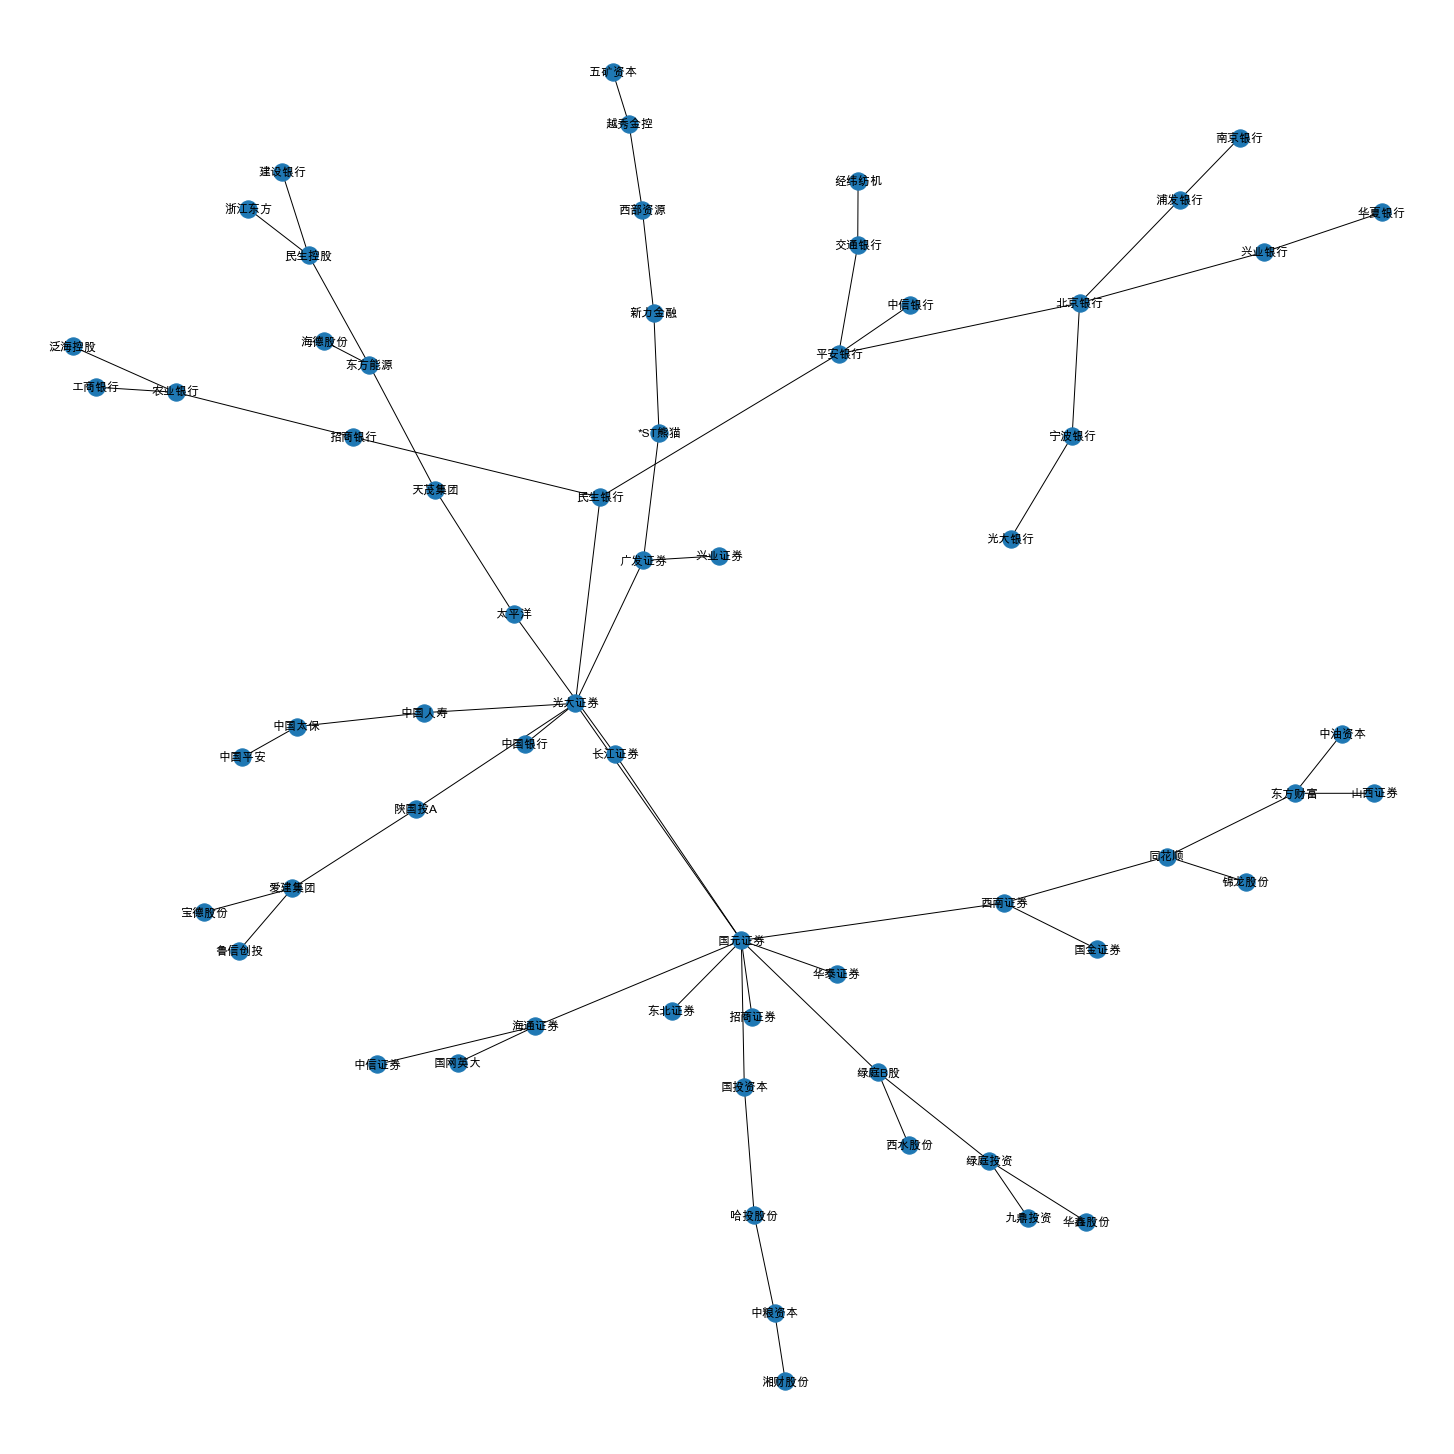

In [65]:
if __name__=='__main__':
    main('2010-11')
